# Multimodal Data Fusion - Project Work: Multi-Modal Physical Exercise Classification


In this project, real multi-modal data is studied by utilizing different techniques presented during the course. In addition, there is an optional task to try some different approaches to identify persons from the same dataset. Open MEx dataset from UCI machine learning repository is used. Idea is to apply different techniques to recognize physical exercises from wearable sensors and depth camera, user-independently.

## Author(s)
Add your information here

Name: Toni Väisänen

Student number: 2124515

## Description 

The goal of this project is to develop user-independent pre-processing and classification models to recognize 7 different physical exercises measured by accelerometer (attached to subject's thigh) and depth camera (above the subject facing downwards recording an aerial view). All the exercises were performed subject lying down on the mat. Original dataset have also another acceleration sensor and pressure-sensitive mat, but those two modalities are ommited in this project. There are totally 30 subjects in the original dataset, and in this work subset of 10 person is utilized. Detailed description of the dataset and original data can be access in [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#). We are providing the subset of dataset in Moodle.

The project work is divided on following phases:

1. Data preparation, exploration, and visualization
2. Feature extraction and unimodal fusion for classification
3. Feature extraction and feature-level fusion for multimodal classification
4. Decision-level fusion for multimodal classification
5. Bonus task: Multimodal biometric identification of persons

where 1-4 are compulsory (max. 10 points each), and 5 is optional to get bonus points (max. 5+5 points). In each phase, you should visualize and analyse the results and document the work and findings properly by text blocks and figures between the code. <b> Nice looking </b> and <b> informative </b> notebook representing your results and analysis will be part of the grading in addition to actual implementation.

The results are validated using confusion matrices and F1 scores. F1 macro score is given as 
<br>
<br>
$
\begin{equation}
F1_{macro} = \frac{1}{N} \sum_i^N F1_i,
\end{equation}
$
<br>
<br>
where $F1_i = 2  \frac{precision_i * recall_i}{precision_i + recall_i}$, and $N$ is the number of classes.
<br>

## Learning goals 

After the project work, you should  

- be able to study real world multi-modal data
- be able to apply different data fusion techniques to real-world problem
- be able to evaluate the results
- be able to analyse the outcome
- be able to document your work properly

## Relevant lectures

Lectures 1-8

## Relevant exercises

Exercises 0-6

## Relevant chapters in course book

Chapter 1-14

## Additional Material 

* Original dataset [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#)
* Related scientific article [MEx: Multi-modal Exercises Dataset for Human Activity Recognition](https://arxiv.org/pdf/1908.08992.pdf)

# 1. Data preparation, exploration, and visualization

<a id='task1'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 1.</b>

Download data from the Moodle's Project section. Get yourself familiar with the folder structure and data. You can read the data files using the function given below. Each file consists one exercise type performed by single user. Data are divided on multiple folders. Note that, in each folder there is one long sequence of single exercise, except exercise 4 which is performed two times in different ways. Those two sequences belongs to same class. Do the following subtasks to pre-analyse data examples and to prepare the training and testing data for next tasks:
<br>
<br> 
<p> <b>1.1</b> Read raw data from the files. Prepare and divide each data file to shorter sequences using windowing method. Similar to related article "MEx: Multi-modal Exercises Dataset for Human Activity Recognition", use 5 second window and 3 second overlapping between windows, producing several example sequences from one exercise file for classification purposes. Windowing is working so that starting from the beginning of each long exercise sequence, take 5 seconds of data points (from synchronized acceleration data and depth images) based on the time stamps. Next, move the window 2 seconds forward and take another 5 seconds of data. Then continue this until your are at the end of sequence. Each window will consists 500x3 matrix of acceleration data and 5x192 matrix of depth image data.</p>
<br>  
<p> <b>1.2</b> Plot few examples of prepared data for each modalities (accelometer and depth camera). Plot acceleration sensor as multi-dimensional time-series and depth camera data as 2D image. Plot 5 second acceleration sensor and depth image sequences of person 1 and 5 performing exercises 2, 5, and 6. Take the first windowed example from the long exercise sequence. </p>
<br>
<p> <b>1.3</b> Split the prepared dataset to training and testing datasets so that data of persons 1-7 are used for training and data of persons 8-10 are used for testing. In next tasks, training dataset could be further divided on (multiple) validation data folds to tune the models parameters, when needed.<br>
<br> 
Document your work, calculate the indicator statistics of training and testing datasets (number of examples, dimensions of each example) and visualize prepared examples.

</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir,getcwd
    
#Reads data from the folders

def read_data_from_folders(folder_name, ID, outputform):
    output = np.empty(outputform, dtype=object)
    
    for n in range(len(ID)):
        #check files in folder.
        currentDir = getcwd()
        filepath = "%s/%s/%02d" %(currentDir, "MEx/" + folder_name, ID[n])
        files = sorted(listdir(filepath))
        count = 0
        
        for f in files:
            file = filepath + "/" + f
            data = pd.read_csv(file, delimiter=',', header=None)
            output[n,count] = data 
            count += 1
            
    return output

folders = ['act', 'dc_0.05_0.05']

allData = []
num = 0
ids = np.arange(1,11)

for fol in folders:
    allData.append(read_data_from_folders(fol, ids, (10,8)))
    


Create windows

In [2]:
def window_slice_start(step):
    return lambda ds: np.arange(0, len(ds), step)

def slice_to_windows(size):
    return lambda ds: (lambda start: ds[start:(start+size)])

# windowing functions for act
slices_of_every_200 = window_slice_start(200)
windows_of_500      = slice_to_windows(500)

# windowing functions for dc
slices_of_every_2   = window_slice_start(2)
windows_of_5        = slice_to_windows(5)

def slice_ds(ds, slicer, windower, drop_timestamp=True):
    
    data = ds.drop(0,1) if drop_timestamp else ds
    
    window_start = slicer(data)
    window_ds = windower(data)
    
    return [pd.DataFrame(window_ds(start)) for start in window_start]

In [3]:
accelometer_data, depth_camera_data = allData

windowed_act_data = list(map(
    lambda participant: 
        [slice_ds(act_file, slices_of_every_200, windows_of_500) 
        for act_file in participant],
    accelometer_data
))

windowed_dc_data = list(map(
    lambda participant: 
        [slice_ds(dc_file, slices_of_every_2, windows_of_5) 
        for dc_file in participant],
    depth_camera_data
))

1.2
1. Plot few examples of prepared data for each modalities (accelometer and depth camera). 
2. Plot acceleration sensor as multi-dimensional time-series and depth camera data as 2D image. 
 

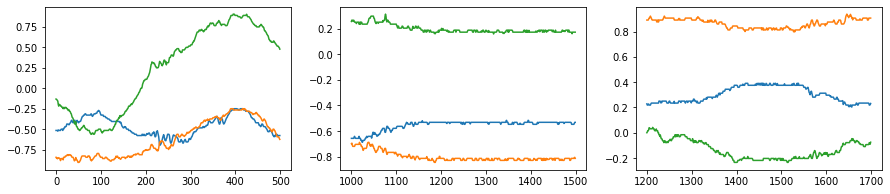

In [4]:
f = plt.figure(figsize=(15,3))

f.add_subplot(1,3,1)
plt.plot(windowed_act_data[0][0][0])

f.add_subplot(1,3,2)
plt.plot(windowed_act_data[0][1][5])

f.add_subplot(1,3,3)
plt.plot(windowed_act_data[0][5][6])

plt.show()

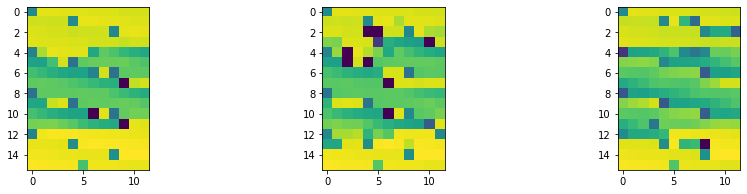

In [5]:
to_plot = [
    windowed_dc_data[0][0][0],
    windowed_dc_data[0][1][5],
    windowed_dc_data[0][5][6]
]

def depth_camera_to_img(data,dim=(16, int(192/16))):
    return data.iloc[0].to_numpy().reshape(dim[0],dim[1])

f = plt.figure(figsize=(15,3))

for i, I in enumerate(to_plot):
    f.add_subplot(1,3,i+1)
    plt.imshow(depth_camera_to_img(I))

plt.show()

3. Plot 5 second acceleration sensor and depth image sequences of person 1 and 5 performing exercises 2, 5, and 6. 
4. Take the first windowed example from the long exercise sequence.

In [6]:
from itertools import combinations

ex_indices = [1,5,6]
participants = [0,4]

to_plot = [(p,e) 
           for p in participants
           for e in ex_indices]

act_plot = [windowed_act_data[p][e] for p,e in to_plot]
dc_plot  = [ windowed_dc_data[p][e] for p,e in to_plot]

### Plot accelometer and depth camera data for participant 1 and 2 for exercises 2, 5 and 6.

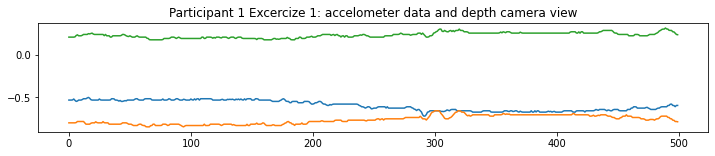

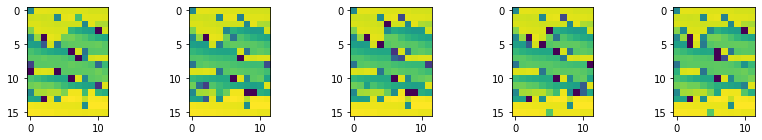

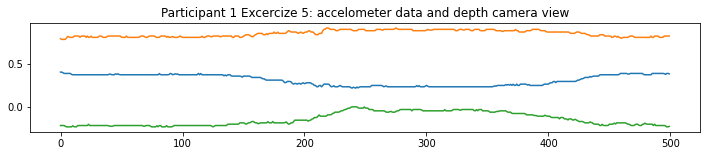

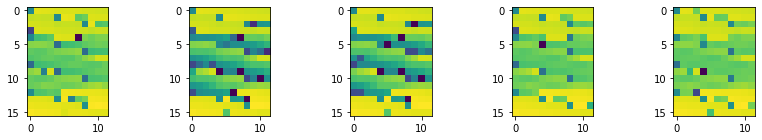

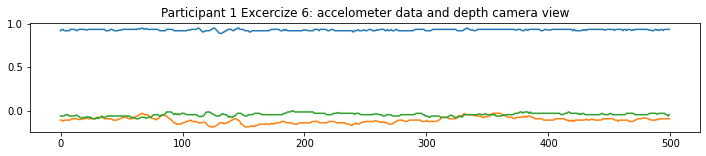

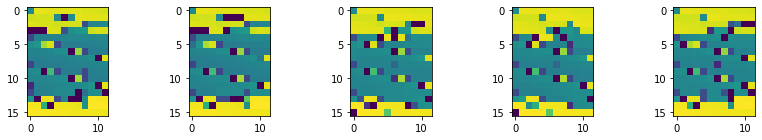

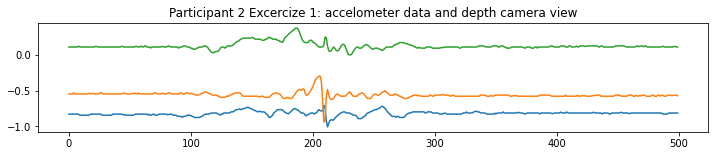

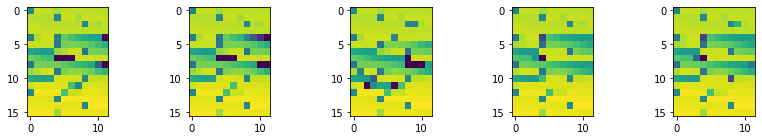

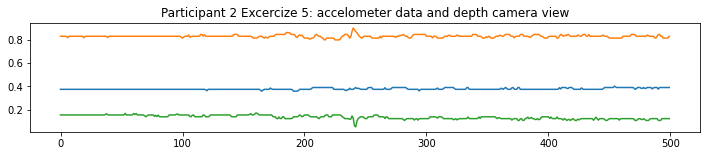

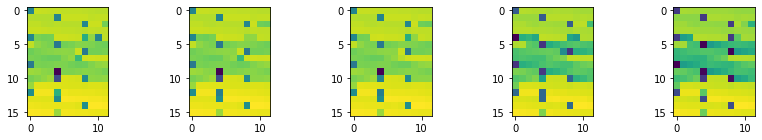

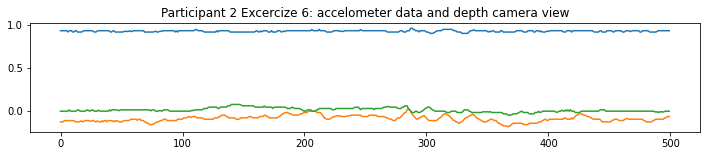

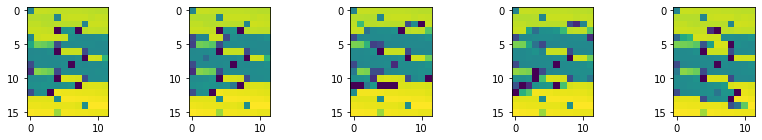

In [7]:
for i in range(6):
    f = plt.figure(figsize=(12,2))
    A = act_plot[i]
    
    ex = ex_indices[i%3]
    participant = 1 if i <=2 else 2
    
    plt.title("Participant {} Excercize {}: accelometer data and depth camera view".format(participant, ex))
    
    plt.plot(A[0])   

    plt.show()

    f = plt.figure(figsize=(14,2))

    for k in range(5):
        f.add_subplot(1,5,k+1)
        sec = k
        plt.imshow(dc_plot[i][0].iloc[sec].to_numpy().reshape(16,int(192/16)))

# 2. Feature extraction and fusion for unimodal classification

<a id='task2'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 2.</b>

Use the training dataset prepared in task 1. to build models based on the combination of principal component analysis (PCA), linear discriminant analysis (LDA), and nearest neighbour (NN) classifier for each modality separately and evaluate the model on test dataset. Do the subtasks given as
<br>
<br>
<p> <b>2.1</b> Calculate PCA and LDA transformations to reduce the dimensionality of accelerometer data (e.g., using scikit-learn implementations). Before transformations downsample data from 100 Hz to 25 Hz (using scipy.signal.resample) to get 125x3 matrix of data for each 5 sec window. You should also standardize the values to zero mean and unit variance before the transformations. 
    
Using training dataset, fit PCA with 5-dimensional subspace (i.e., choosing the 5 largest principal components) and fit LDA with 5-dimensional subspace. 
    
Transform both train and test examples to this low-dimensional feature representation. Concatenate each sequence to single vector size of 3x(5+5). Perform the fusion of PCA and LDA similar manner as presented in Lecture 3 (pages-19-20) using NN method. Evaluate the performance on testset. Show confusion matrix and F1 scores of the results. </p>
<br>
<p> <b>2.2</b> Use PCA and LDA transformations to reduce the dimensionality of depth images. You should also standardize the values to zero mean and unit variance before the transformations. Fit PCA and LDA for all training images (12x16, 192-dimensional in vectorized form) by choosing 5-dimensional subspace for both PCA and LDA. Transform both train and test examples to this low-dimensional feature representation. Concatenate each sequence to single vector size of 5x1x(5+5). Similar to task 2.1, do the PCA and LDA fusion using NN and evaluate the performance on testset. Show confusion matrix and F1 scores of the results. </p>
<br> 
Document your work, evaluate the results, and analyse the outcomes in each subtasks 2.1-2.2.
    
</div>

In [8]:
from sklearn.preprocessing import StandardScaler
from scipy.signal import resample
from sklearn.decomposition import PCA

Test the behavior of resample and StandardScaler.

In [9]:
t = windowed_act_data[0][0][0]
r = resample(t,125)
scl = StandardScaler().fit(r)
scl.mean_
# array([-0.45915139, -0.62001112,  0.2310757 ])
scl.scale_
# array([0.11539072, 0.22094048, 0.51254617])

s = scl.transform(t)
s.mean(axis=0)
# array([-9.94759830e-16,  3.41060513e-16, -1.13686838e-16])
s.std(axis=0)
# array([1.00120432, 1.00056203, 1.00058575])
r.shape
# (125, 3)

(125, 3)

Resample and normalize a dataframe, use 125 as default framerate

In [53]:
def resample_n_normalize_window(W, sample_rate=125):
    W_resampled = resample(W,sample_rate)
    return StandardScaler().fit(W_resampled).transform(W_resampled)


resampled = list()
labels = []
for p in windowed_act_data:
    p_w = list()
    for i, e in enumerate(p):

        p_w.append(np.array([resample(w, 125) 
                               # for window in exercise
                    for w in e # but only if filter
                               # window 5 sec
                    if w.shape[0] == 500]))
        
    resampled.append(np.array(p_w))
    


<ipython-input-53-101d971331d9>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  resampled.append(np.array(p_w))


(10, 8)

In [179]:

# collect labels for the LDA phase eight
# files per each participant each of the 
# exercise has one but fourth has two files
get_label = lambda i: [1,2,3,4,4,5,6,7][i]


resampled_t = list()
for p_i, p in enumerate(resampled):
    print(np.array(p).shape)
    p_ex = list()
    for e_i, e in enumerate(p):
        #print("\t", np.array(e).shape)
        ex_w = list()
        for i, w in enumerate(e):
            t = np.array(w).transpose()
            # print("\t\t w:{}".format(i), t.shape)
            ex_w.append(t)
            
        exercise_windows = np.vstack(ex_w)
        z,w = exercise_windows.shape
        
        labels = np.vstack([
            np.repeat([p_i + 1],z), 
            np.repeat([get_label(e_i)],z) , 
            np.repeat([i],z),
            np.tile(['x','y','z'],int(z/3))]
        ).transpose()
        
        p_ex.append(np.hstack([labels, exercise_windows]))
    
    stacked = np.vstack(p_ex)
    print(stacked.shape)
    resampled_t.append(stacked)
    
def flatten_2d_array(arr):
    return np.array(reduce(lambda a,b:a+b, arr,[]))

R = pd.DataFrame(
    np.vstack(resampled_t), 
    columns=np.hstack([
        #['participant','exercise', 'window', 'dimension'], 
        [1111,2222,3333,4444],
        np.arange(0,125)
    ]))

#np.vstack([np.repeat(['foo'],2), np.repeat(['w'],2)]).transpose()
R.to_csv('act_data_125.csv')

(8,)
(678, 129)
(8,)
(639, 129)
(8,)
(537, 129)
(8,)
(564, 129)
(8,)
(726, 129)
(8,)
(618, 129)
(8,)
(699, 129)
(8,)
(594, 129)
(8,)
(609, 129)
(8,)
(591, 129)


In [182]:
D = R[np.arange(0,125)].astype(float)

R['mean'] = D.mean(axis=1)
R['std']  = D.std(axis=1)

R.to_csv('act_data_125_mean_std.csv')

Create normalized and resampled version of accelometer data. Exclude windows less than 5 sec.

2.1 
- Before transformations downsample data from 100 Hz to 25 Hz (using scipy.signal.resample) to get 125x3 matrix of data for each 5 sec window. 
- You should also standardize the values to zero mean and unit variance before the transformations. Using training dataset, 

In [11]:

reshaped_act_data = list()
labels = []
for p in windowed_act_data:
    p_w = list()
    for i, e in enumerate(p):

        p_w.append([resample_n_normalize_window(w) 
                               # for window in exercise
                    for w in e # but only if filter
                               # window 5 sec
                    if w.shape[0] == 500])
        
    reshaped_act_data.append(p_w)
    
# windowed_act_data
# (10, 8, 33)
# reshaped_act_data
# (10, 8, 33)
len(labels)

0

In [12]:
training_participants = [reshaped_act_data[p] for p in np.arange(0,8)]
test_participants     = [reshaped_act_data[p] for p in np.arange(8,10)]

training_data   = list() # concat x,y,x
training_data_3 = list() # for each window
test_data       = list() # concat x,y,z
test_data_3     = list() # for each window
training_labels = list()
test_labels     = list()


# collect labels for the LDA phase eight
# files per each participant each of the 
# exercise has one but fourth has two files
get_label = lambda i: [1,2,3,4,4,5,6,7][i]

for p in training_participants:
    for i, e in enumerate(p):
        label = get_label(i)
        for w in e:
            training_labels.append(label)
            training_data.append(w.transpose())
            
for p in test_participants:
    for i, e in enumerate(p):
        label = get_label(i)
        for w in e:
            test_labels.append(label)
            test_data.append(w.transpose())

X = np.array(training_data)
T = np.array(test_data)

print("training data: {}\n    test data:  {}".format(X.shape, T.shape)) 

training data: (1685, 3, 125)
    test data:  (400, 3, 125)


In [13]:
# Sequence is used to describe an exercise routine
# concatenate each exercise sequence to a 3x5 representation with 

# Test that the reshape does what expected
pca = PCA(n_components=5)
t = np.array([
    np.ones((3,5)),
    np.ones((3,5)) * 2,
    np.ones((3,5)) * 3,
])
collapsed = t.reshape(9,5)
reconstructed = collapsed.reshape(3, 3, 5)
reconstructed == t

array([[[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]],

       [[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]],

       [[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]]])

In [14]:
# test joining two 3x5 matrices to 3x(5+5)
import cv2 

a = np.array([
    np.ones((3,5)) * 1.1,
    np.ones((3,5)) * 1.2,
    np.ones((3,5)) * 1.3,
])
b = np.array([
    np.ones((3,5)) * 2.1,
    np.ones((3,5)) * 2.2,
    np.ones((3,5)) * 2.3,
])
r = np.array([
    k.shape
    for k in a 
    for l in b ])
    
x,y,z = a.shape


r = np.zeros((3,10))
for i, w in enumerate(a):
    for j, f in enumerate(w):
        c = np.concatenate((a[i][j], b[i][j]))
        r[j] = c

[cv2.hconcat([a0,b0]) for a0, b0 in zip(a,b)]

[array([[1.1, 1.1, 1.1, 1.1, 1.1, 2.1, 2.1, 2.1, 2.1, 2.1],
        [1.1, 1.1, 1.1, 1.1, 1.1, 2.1, 2.1, 2.1, 2.1, 2.1],
        [1.1, 1.1, 1.1, 1.1, 1.1, 2.1, 2.1, 2.1, 2.1, 2.1]]),
 array([[1.2, 1.2, 1.2, 1.2, 1.2, 2.2, 2.2, 2.2, 2.2, 2.2],
        [1.2, 1.2, 1.2, 1.2, 1.2, 2.2, 2.2, 2.2, 2.2, 2.2],
        [1.2, 1.2, 1.2, 1.2, 1.2, 2.2, 2.2, 2.2, 2.2, 2.2]]),
 array([[1.3, 1.3, 1.3, 1.3, 1.3, 2.3, 2.3, 2.3, 2.3, 2.3],
        [1.3, 1.3, 1.3, 1.3, 1.3, 2.3, 2.3, 2.3, 2.3, 2.3],
        [1.3, 1.3, 1.3, 1.3, 1.3, 2.3, 2.3, 2.3, 2.3, 2.3]])]

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import cv2

# transform matrix [w, (x,y,z), (m125_x, m125_y, m125_z)]
# to format        [(x,y,z),    (m125_x, m125_y, m125_z)]
# for dimensionality  reduction and reconstruct
# back to          [w, (x,y,z), (m5_x, m5_y, m5_z)]

def collapse_windows_pca(windows, n=5):
    """
    windows is an array of (3, n_samples)
    row for each x,y,z. Should have written 
    this as a dataframe.
    """
    x,y,z     = windows.shape
    
    flattened = windows.reshape((x*y, z))
    collapsed = PCA(n_components=n).fit_transform(flattened)
    return      collapsed.reshape(x,y,n)


def collapse_windows_lda(windows, labels, n=5):
    """
    windows is an array of (3, n_samples)
    row for each x,y,z. Should have written
    this as a Dataframe...
    """
    x,y,z     = windows.shape
    labels_rep= np.repeat(labels,y)
    flattened = windows.reshape((x*y, z))
    collapsed = LDA(n_components=n).fit_transform(flattened,labels_rep)
    return      collapsed.reshape(x,y,n)


def join_pca_lda(a,b):
    
    if a.shape != b.shape:
        raise Exception('not gonna work, dimensions do not match!')
        
    return np.array([cv2.hconcat([a0,b0]) for a0, b0 in zip(a,b)])


join_pca_lda(a,b)

array([[[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]],

       [[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]],

       [[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]],

       [[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]],

       [[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]]])

In [16]:
X_PCA = collapse_windows_pca(X)
X_LDA = collapse_windows_lda(X, training_labels)
X_F   = join_pca_lda(X_PCA, X_LDA)
X_F.shape

(1685, 3, 10)

In [17]:
T_PCA = collapse_windows_pca(T)
T_LDA = collapse_windows_lda(T, test_labels)
T_F   = join_pca_lda(T_PCA, T_LDA)
T_F.shape

(400, 3, 10)

The results are validated using confusion matrices and F1 scores. F1 macro score is given as 
<br>
<br>
$
\begin{equation}
F1_{macro} = \frac{1}{N} \sum_i^N F1_i,
\end{equation}
$
<br>
<br>
where $F1_i = 2  \frac{precision_i * recall_i}{precision_i + recall_i}$, and $N$ is the number of classes.
<br>

In [18]:
# todo: continue from here
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X_F[0])
distances, indices = nbrs.kneighbors(X_F[0])
indices


array([[0, 1],
       [1, 2],
       [2, 1]])

![19](page-19.png)
![20](page-20.png)

 2.2 
 - Use PCA and LDA transformations to reduce the dimensionality of depth images. 
 - Standardize the values to zero mean and unit variance before the transformations. 
 - Fit PCA and LDA for all training images (12x16, 192-dimensional in vectorized form) by choosing 5-dimensional subspace for both PCA and LDA. 
 - Transform both train and test examples to this low-dimensional feature representation. 
 - Concatenate each sequence to single vector size of 5x1x(5+5). 
 - Similar to task 2.1, do the PCA and LDA fusion using NN and evaluate the performance on testset. Show confusion matrix and F1 scores of the results.


In [19]:
l = np.ones((2,1)) * 3
np.hstack([np.zeros((2,2)),l])
x = np.empty((1,10))
a = np.zeros((5,10))
b = np.ones((5,10))
np.vstack([x,a,b])

array([[ 0.1 ,  0.2 ,  0.25,  0.5 ,  1.  ,  2.  ,  2.5 ,  5.  , 10.  ,
        20.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ],
       [ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
         1.  ],
       [ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
         1.  ],
       [ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
         1.  ],
       [ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
         1.  ],
       [ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
         1.  ]])

In [20]:
def normalize_image(I):
    return StandardScaler().fit(I).transform(I)



participant_images = np.array(windowed_dc_data)

training_normalized_imgs = list()
test_normalized_imgs     = list()

get_label = lambda i: [1,2,3,4,4,5,6,7][i]

pca = PCA(n_components=5)

for participant_i, p in enumerate(participant_images):
    
    p_ex = list()
    # print("p: ", participant_i)
    for e_i, e in enumerate(p):
        e_imgs = list()
        
        for i in e:
            if len(i) == 5:
                n = np.array(normalize_image(i))
                # print("\t", n.shape)
                e_imgs.append(n)
                
        E = np.array(e_imgs, dtype='object')
    
        row_count = E.shape[0]*E.shape[1]
        n_samples   = E.shape[2]
        
        # get the label
        label = get_label(e_i)
        
        # create label vector 
        labels = np.ones((E.shape[0]*E.shape[1],1)) * label

        ER = E.reshape(E.shape[0]*E.shape[1], E.shape[2])
        ERL = np.hstack([labels, ER])
        
        # print("\t\tex: ", label, ", data: ", ERL.shape)
        
        p_ex.append(ERL)
    
    P = np.vstack(p_ex)
    
    # print("P:  ", P.shape)

    if participant_i < 8:
        training_normalized_imgs.append(P)
    else:
        test_normalized_imgs.append(P)
        
from functools import reduce

def flatten_2d_array(arr):
    return np.array(reduce(lambda a,b:a+b, arr,[]))


XI_norm = pd.DataFrame(np.vstack(training_normalized_imgs))
TI_norm = pd.DataFrame(np.vstack(test_normalized_imgs))


<ipython-input-20-4600d3199043>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  participant_images = np.array(windowed_dc_data)


In [21]:
XI_norm[np.arange(1,193)]

,1,2,3,4,5,6,7,8,9,10,...,183,184,185,186,187,188,189,190,191,192
0,-1.224745,0.0,1.528942,0.0,-0.5,0.5,-0.816497,0.000000,-0.500000,0.502042,...,0.485509,1.224745,-1.0,-0.886964,-0.5,0.5,0.504884,0.5,-1.105959,0.514748
1,0.816497,0.0,-1.401530,0.0,-0.5,0.5,1.224745,0.000000,0.750000,0.502042,...,1.352488,1.224745,-1.0,1.222008,-0.5,0.5,0.498370,0.5,-0.047062,0.514748
2,-1.224745,0.0,-0.382235,0.0,-0.5,0.5,-0.816497,0.000000,-1.750000,-1.999990,...,-1.161753,-0.816497,-1.0,-0.673657,-0.5,0.5,0.498370,0.5,-1.105959,-1.171495
3,0.816497,0.0,-0.382235,0.0,-0.5,0.5,-0.816497,0.000000,0.750000,0.502042,...,0.485509,-0.816497,-1.0,-0.881609,-0.5,0.5,0.498370,0.5,1.129490,1.313494
4,0.816497,0.0,0.637059,0.0,2.0,-2.0,1.224745,0.000000,0.750000,0.493865,...,-1.161753,-0.816497,-1.0,1.220223,2.0,-2.0,-1.999994,-2.0,1.129490,-1.171495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8575,-0.500000,0.0,-1.000000,0.0,0.0,2.0,1.000000,-0.046932,0.816497,0.000000,...,0.816497,-1.000000,-0.5,0.000000,0.5,-1.0,-0.047062,-1.0,0.500000,-1.069045
8576,-0.500000,0.0,-1.000000,0.0,0.0,-0.5,1.000000,0.657053,-1.224745,0.000000,...,0.816497,-1.000000,-0.5,0.000000,0.5,-1.0,1.129490,-1.0,0.500000,-1.069045
8577,-0.500000,0.0,-1.000000,0.0,0.0,-0.5,1.000000,-1.924225,-1.224745,0.000000,...,-1.224745,-1.000000,-0.5,0.000000,0.5,-1.0,-1.105959,-1.0,-2.000000,1.603567
8578,-0.500000,0.0,-1.000000,0.0,0.0,-0.5,1.000000,0.657053,0.816497,0.000000,...,0.816497,-1.000000,2.0,0.000000,0.5,-1.0,1.129490,-1.0,0.500000,0.267261


In [22]:
data_cols = np.arange(1,193)
label_col = 0
pca = PCA(n_components=5)

XI_coll_pca = pca.fit_transform(XI_norm[data_cols])
XI_coll_lda = pca.fit_transform(XI_norm[data_cols], XI_norm[label_col])

TI_coll_pca = pca.fit_transform(TI_norm[data_cols])
TI_coll_lda = pca.fit_transform(TI_norm[data_cols], XI_norm[label_col])

if XI_coll_pca.shape != XI_coll_lda.shape:
    raise Expection('Something went wrong, dimensions do not match!')

x,y = XI_coll_pca.shape
n_rows = int(x / 5)
n_rows_test = int(TI_coll_lda.shape[0]/5)

print(x,y,n_rows)

Isub5_pca = XI_coll_pca.reshape((n_rows, 5, 5))
Isub5_lda = XI_coll_lda.reshape((n_rows, 5, 5))

I_t_sub5_pca = TI_coll_pca.reshape((n_rows_test, 5, 5))
I_t_sub5_lda = TI_coll_lda.reshape((n_rows_test, 5, 5))

print("pca: ", XI_coll_pca.shape)
print("lda: ", XI_coll_lda.shape)
print("pca: ", Isub5_pca.shape)
print("lda: ", Isub5_lda.shape)


8580 5 1716
pca:  (8580, 5)
lda:  (8580, 5)
pca:  (1716, 5, 5)
lda:  (1716, 5, 5)


In [23]:
I_sub_10 = join_pca_lda(Isub5_pca,Isub5_lda).shape

# 3. Feature extraction and feature-level fusion for multimodal classification

<a id='task3'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 3.</b>

Prepare new feature sets for each modality and combine them to single feature representation. Compare two classifiers from scikit-learn. Train classifiers using joint feature presentation. Evaluate and compare the result using testing dataset. Do the subtasks given as
<br>   
<br> 
<p> <b>3.1</b> Similar to task 2.1, calculate PCA for accelerometer, but choose now the 10 largest principal components as 10-dim feature vector for each window. In addition, for each window calculate mean and standard deviation of each three acc channels as statistical features, resulting 6-dimensional vector. Combine these to 36-dimensional final feature vector.</p>
<br>  
<p> <b>3.2</b> Similar to task 2.2, calculate the PCA for depth images using same setup, but now choose the 10 largest principal components as feature vector. Concatenate the image sequence forming 50-dimensional feature vector from each windowed example.</p>
<br> 
<p> <b>3.3</b> Form a joint feature presentation of features extracted in 3.1 and 3.2, resulting 86-dimensional feature vector for each example. Normalize data between 0-1 using the training dataset. Use support vector machine (SVM) with RBF-kernel and Gaussian naiveBayes classifier (use default parameter values for both classifiers). Train the classifiers and evaluate and compare classifiers on testset using confusion matrices and F1 scores.</p>
<br> 
Document your work, evaluate the results, and analyse the outcomes in each subtasks 3.1-3.3.
    
</div>

In [44]:
#X_PCA_10 = collapse_windows_pca(X, n=10)

# this still requires the mean and std dev [mu,sigma,mu,sigma,mu,sigma] to be concatenatedk
#X_PCA_10.reshape(1685, 1, 30).shape 

x,y,z = X.shape

Xdf = pd.DataFrame(X.reshape((x*y, z)))
    
#    flattened = windows.reshape((x*y, z))
#    collapsed = PCA(n_components=n).fit_transform(flattened)
#    return      collapsed.reshape(x,y,n)


Xdf['mean'] = Xdf.mean(axis=1)
Xdf.std(axis=1)

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
5050    1.0
5051    1.0
5052    1.0
5053    1.0
5054    1.0
Length: 5055, dtype: float64

In [25]:
data_cols = np.arange(1,193)
label_col = 0
pca = PCA(n_components=10)

XI_coll_pca_10 = pca.fit_transform(XI_norm[data_cols])
TI_coll_pca_10 = pca.fit_transform(TI_norm[data_cols])

x,y = XI_coll_pca_10.shape

n_rows = int(x / 5)
n_rows_test = int(TI_coll_pca_10.shape[0]/5)

print(x,y,n_rows)

Isub10_pca = XI_coll_pca_10.reshape((n_rows, 5, 10))
I_t_sub10_pca = TI_coll_pca.reshape((n_rows_test, 5, 10))

I_f_10 = Isub10_pca.reshape((n_rows, 1, 50))

print("pca: ", XI_coll_pca_10.shape)
print("pca: ", Isub10_pca.shape)
print("pca: ", I_f_10.shape)

8580 10 1716


ValueError: cannot reshape array of size 10175 into shape (407,5,10)

In [ ]:
np.array([np.ones((5,10)) * 1,
np.ones((5,10)) * 2]).reshape(2,1,50)

# 4. Decision-level fusion for multimodal classification

<a id='task4'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 4.</b>

Use features calculated for each modality in task 3. Choose base classifier for each modality from scikit-learn. Train classifiers for each modality feature presentations separately and combine the outputs in decision level. Evaluate and compare the result on testing dataset. Do the subtasks given as
<br>
<br> 
<p> <b>4.1</b> Use base classifiers of support vector machine (SVM) with RBF-kernel and AdaBoost classifier (with random_state=0). 
Normalize data between 0-1 using the training dataset. Train the base classifiers by tuning the model parameters (<i>C</i> parameter and RBF-kernel <i>gamma</i> in SVM as well as <i>n_estimators</i> and <i>learning_rate</i> in Adaboost) using 10-fold cross-validation on training dataset to find optimal set of parameters (hint: use GridSearchCV from scikit-learn). For grid search use the following values $C = [0.1, 1.0, 10.0, 100.0]$, $gamma=[0.1, 0.25, 0.5, 0.75, 1.0, 2.0]$, $n\_estimators = [50, 100, 500, 1000]$, and $learning\_rate = [0.1, 0.25, 0.5, 0.75,1.0]$. Choose the best parameters and train the classifiers for each modality on whole training dataset. Is there a possibility that classifiers will overfit to training data using this parameter selection strategy? If so, why? </p>
<br>
<p> <b>4.2</b> Predict probabilistic outputs of each trained classifier for both modalities using the test set. </p>
<br>
<p> <b>4.3</b> Combine the probabilistic outputs of different modalities by fixed classification rules: max, min, prod, and sum. Evaluate, compare, and analyse the final combined results using confusion matrices and F1 scores. Show results for each base classifier combinations (i.e., $SVM_{acc}+SVM_{depth}$, $AdaBoost_{acc}+AdaBoost_{depth}$, $SVM_{acc}+AdaBoost_{depth}$, $AdaBoost_{acc}+SVM_{depth}$)</p>
<br>
Document your work, evaluate the results, and analyse the outcomes in each subtasks 4.1-4.3.
    
</div>

# 5. Bonus task: Multimodal biometric identification of persons (optional)

<a id='task5'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 5.</b>

Can you build a classifier that recognizes the person who is performing the exercise? Use same 10 person dataset and split it so that first 25% of each long exercise sequence is used for training and rest 75% of each sequence is used for testing the classifier. Use same 5 second windowing with 3 seconds overlap to prepare the examples. Note that, now the person identity is the class label instead of exercise type. Max. 10 points are given but you can earn points from partial solution, as well.
<br> 
<br> 
<p> <b>5.1</b> Build a classifier to identify persons based on the features and one of the models given in task 4 (max. 5 points).</p>
<br> 
<p> <b>5.2</b> Can you build your own solution (using new features, new classification model or different fusion approaches) to beat the approach in Task 5.1 ? (max. 5 points) </p>
<br>  
Document your work. Evaluate and compare the results using confusion matrix and F1 score.

</div>